In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from datasets import Dataset

In [3]:
table=pd.read_csv('bill_authentication.csv')
table


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
x=table.drop('Class', axis=1)
y=table['Class']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [6]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [7]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
y_pred=model.predict(x_test)

In [9]:
dict={
    'Actual': y_test, 'Predict': y_pred
}

data=pd.DataFrame(dict)
data

,Actual,Predict
878,1,1
429,0,0
463,0,0
1199,1,1
1233,1,1
...,...,...
1132,1,1
1231,1,1
104,0,0
683,0,0


In [10]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [11]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        68
           1       1.00      0.97      0.99        70

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



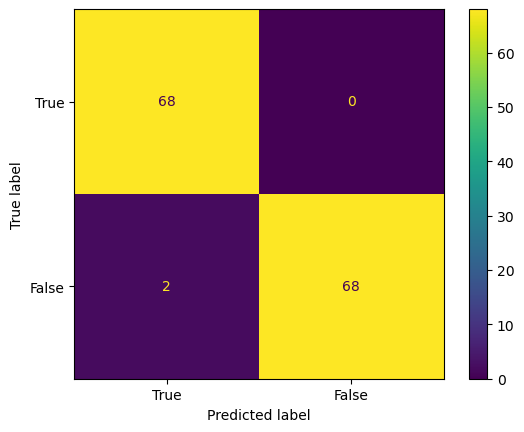

In [12]:
cm=confusion_matrix(y_pred,y_test)
cm_display=ConfusionMatrixDisplay(cm, display_labels=[True,False,])
cm_display.plot()
plt.show()

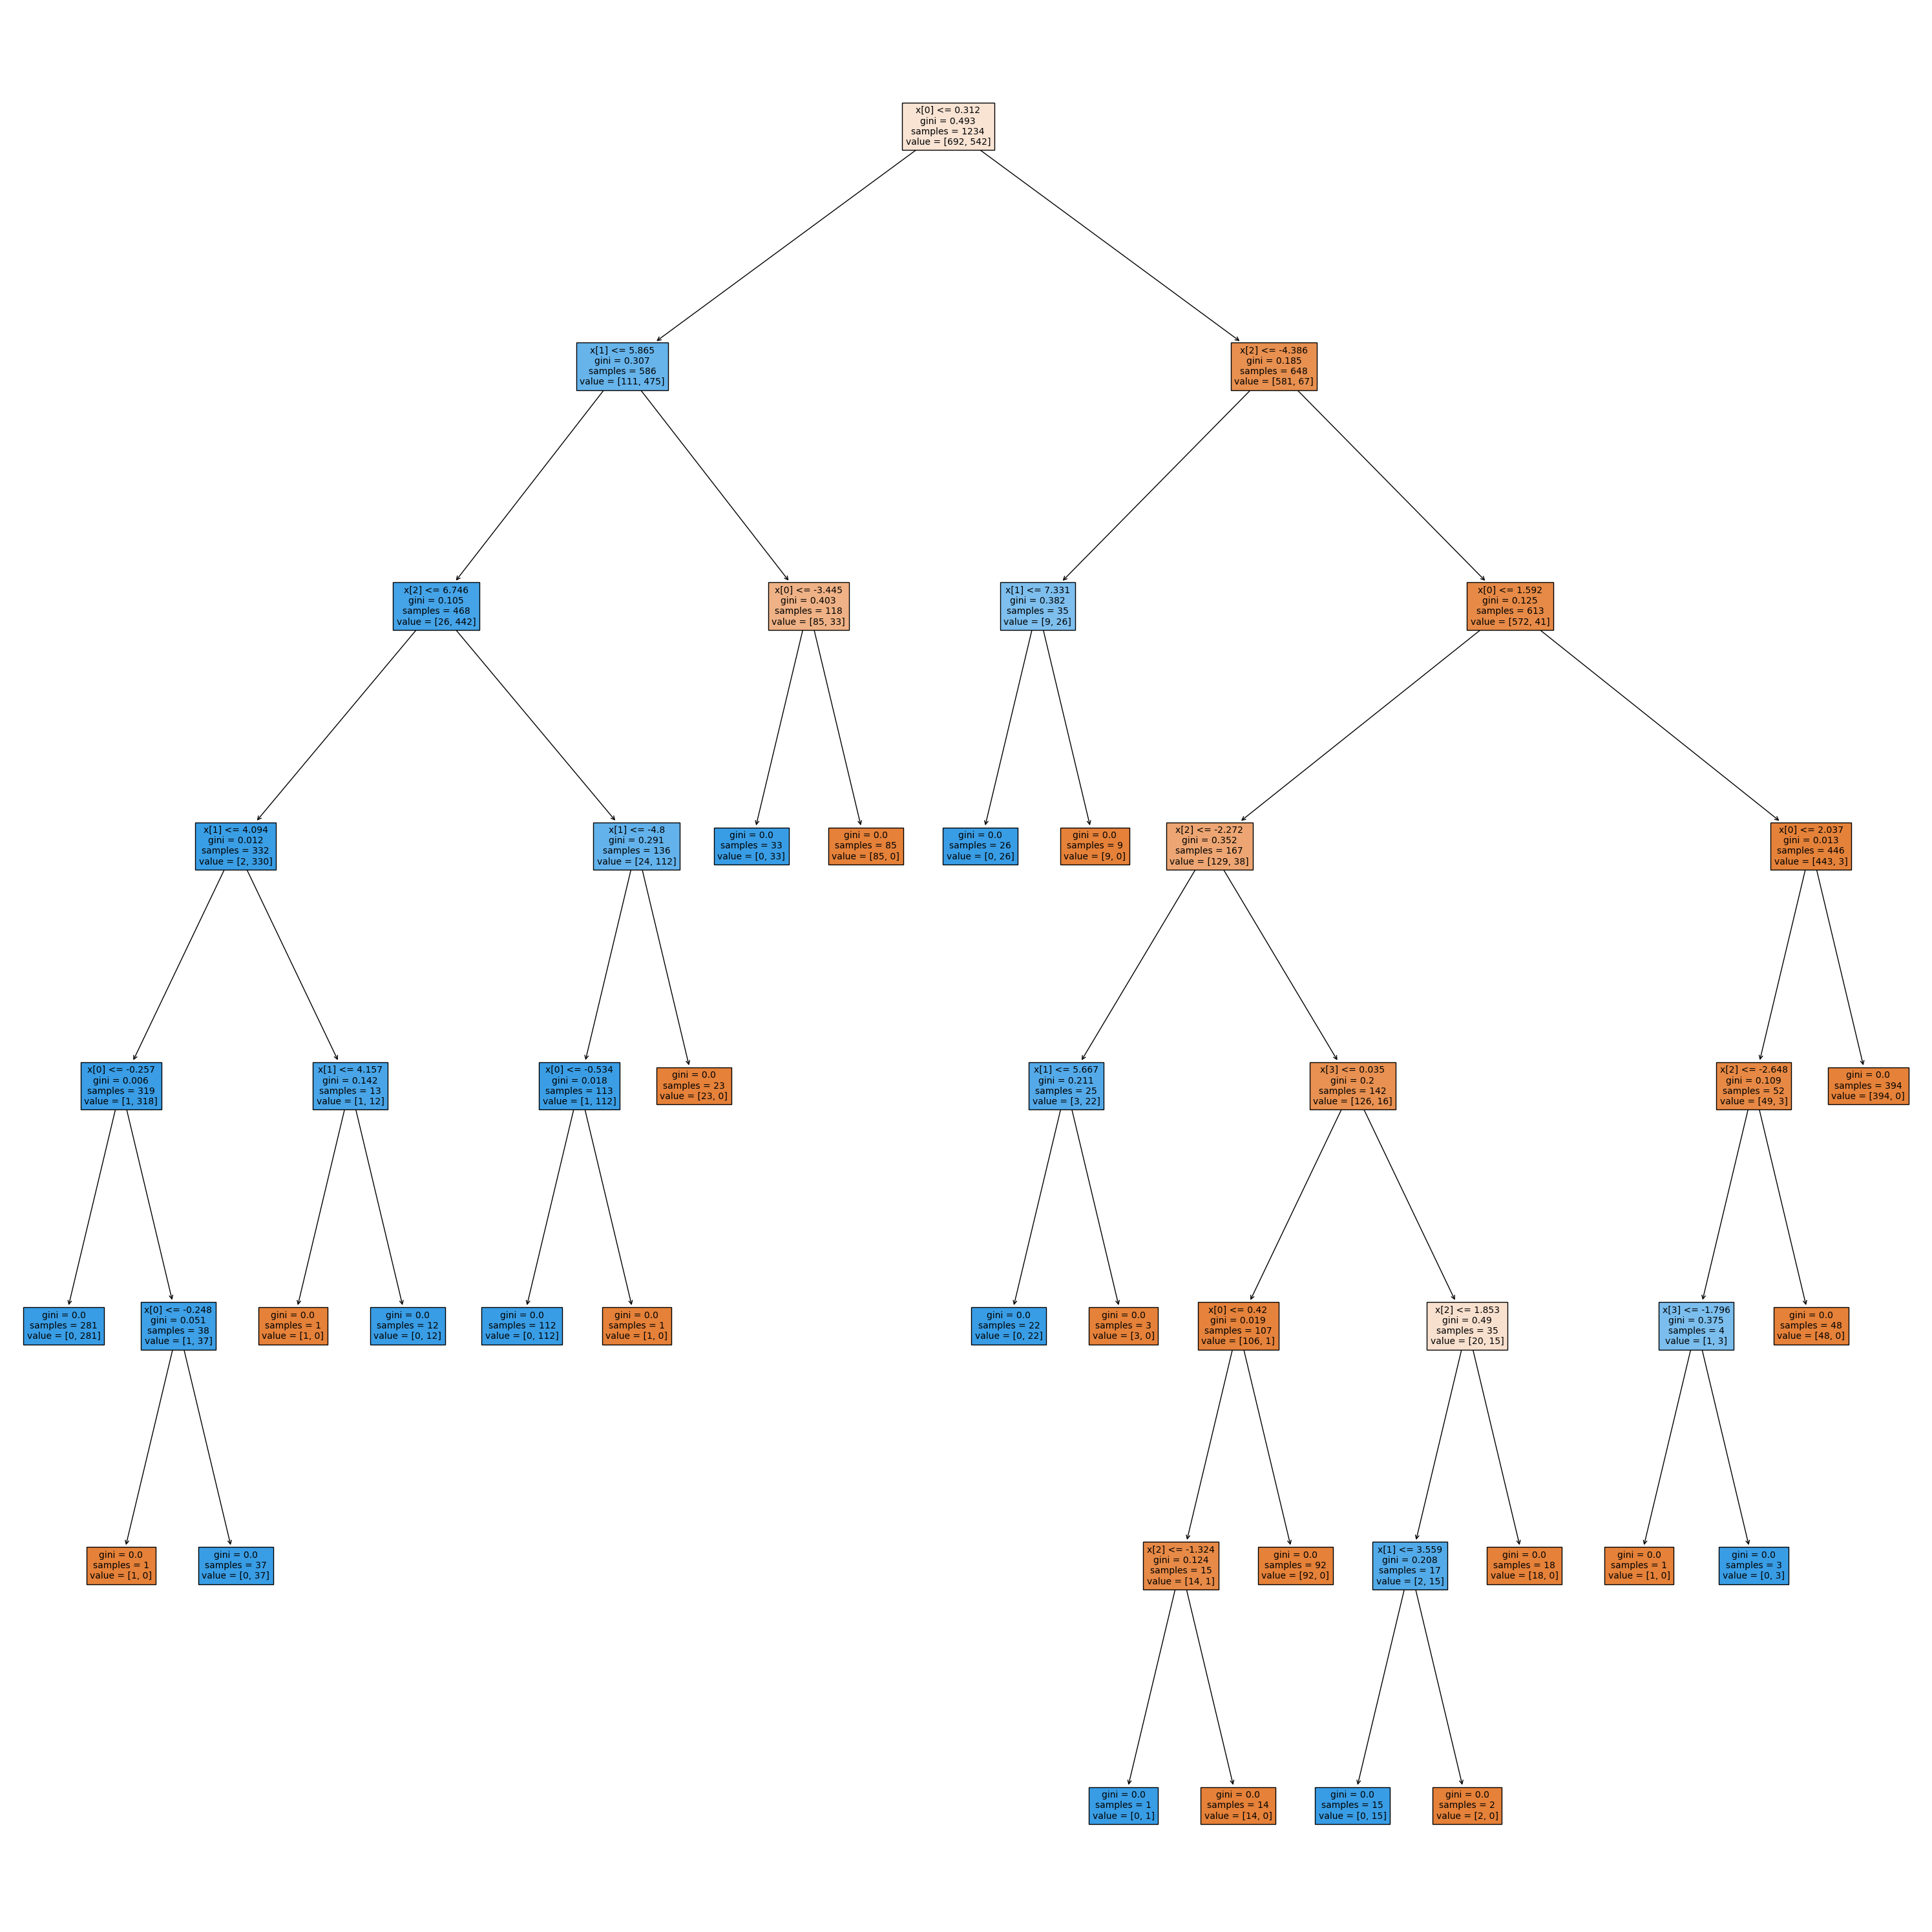

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(model, fontsize=10, filled=True)
plt.tight_layout()
plt.show()